In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = os.path.join(os.getcwd(), 'data')
data_path

'C:\\Users\\lynkx\\Python Projects\\BB\\data'

In [4]:
df_kpis = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='KPIs')
df_spending = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='Spending')

In [5]:
df_kpis.sort_values(by='Date', inplace=True)
# df_kpis.head(20)

In [6]:
df_kpis.shape

(932, 12)

In [7]:
df_kpis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 931
Data columns (total 12 columns):
Date    932 non-null datetime64[ns]
K1      932 non-null int64
K2      932 non-null int64
K3      932 non-null int64
K4      932 non-null int64
K5      932 non-null int64
K6      932 non-null int64
K7      932 non-null int64
K8      932 non-null int64
K9      932 non-null float64
K10     932 non-null float64
K11     932 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 94.7 KB


In [8]:
df_kpis.describe()

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,11.957082,121.608369,1224.939914,1008.123391,2394.230687,2235.681330,401.503219,7398.043991,5.462774,0.374937,0.284551
std,92.494702,378.316995,516.493054,2823.077832,715.492618,1735.547803,382.924656,3998.842786,0.919098,0.115165,0.096236
min,0.000000,0.000000,155.000000,0.000000,194.000000,109.000000,83.000000,923.000000,3.030303,0.083159,0.035433
25%,0.000000,13.000000,826.750000,3.000000,1856.000000,1009.750000,235.000000,4504.000000,4.914800,0.291034,0.216624
50%,0.000000,27.000000,1234.000000,20.000000,2316.000000,1546.500000,330.000000,6224.000000,5.262321,0.404677,0.267932
75%,2.000000,56.000000,1482.500000,159.000000,2798.750000,3089.000000,448.000000,9447.500000,5.693961,0.454279,0.346154
max,2117.000000,4716.000000,3425.000000,20157.000000,5159.000000,8214.000000,6853.000000,25456.000000,9.331267,0.670593,0.678571


In [9]:
df_spending.sort_values(by='Date', inplace=True)
# df_spending.head()

In [10]:
df_spending.shape

(48, 4)

In [11]:
df_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 20
Data columns (total 4 columns):
Date    48 non-null datetime64[ns]
E1      48 non-null int64
E2      48 non-null int64
E3      48 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.9 KB


In [12]:
df_spending.describe()

,E1,E2,E3
count,48.000000,48.000000,48.000000
mean,46641.375000,156225.062500,202866.437500
std,35972.240014,141070.034149,155455.458537
min,275.000000,0.000000,8490.000000
25%,16821.750000,20376.750000,63422.500000
50%,36485.500000,137202.500000,195134.000000
75%,69458.500000,264528.000000,315655.750000
max,169345.000000,683948.000000,711357.000000


In [36]:
df_kpis['month'] = df_kpis['Date'].dt.month
df_kpis['year'] = df_kpis['Date'].dt.year
df_kpis['weekday'] = df_kpis['Date'].dt.weekday
df_kpis['days_in_month'] = df_kpis['Date'].dt.daysinmonth

df_kpis_date = df_kpis['Date']

df_spending['month'] = df_spending['Date'].dt.month
df_spending['year'] = df_spending['Date'].dt.year
df_spending['days_in_month'] = df_spending['Date'].dt.daysinmonth
df_spending.index = df_spending['Date']
df_spending.drop('Date', axis=1, inplace=True)

df_spending['avgE1'] = df_spending['E1']/df_spending['days_in_month']
df_spending['avgE2'] = df_spending['E2']/df_spending['days_in_month']

df_kpis = df_kpis.merge(df_spending[['year', 'month', 'avgE1', 'avgE2']], on=['year', 'month'],
                        how='inner')
df_kpis.index = df_kpis_date

df_kpis.drop(['year', 'days_in_month'], axis=1, inplace=True)

In [38]:
df_kpis.head()

,Date,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,month,weekday,avgE1,avgE2
Date,,,,,,,,,,,,,,,,
2015-03-16,2015-03-16,0,0,155,0,194,379,195,923,3.030303,0.210184,0.333333,3,0,530.129032,4403.387097
2015-03-17,2015-03-17,1,8,1074,34,1320,658,468,3563,4.532667,0.370474,0.301205,3,1,530.129032,4403.387097
2015-03-18,2015-03-18,0,10,1129,46,1349,652,493,3679,4.902364,0.366676,0.288462,3,2,530.129032,4403.387097
2015-03-19,2015-03-19,0,7,1107,33,1251,597,522,3517,4.775744,0.355701,0.385714,3,3,530.129032,4403.387097
2015-03-20,2015-03-20,0,13,1116,143,1484,606,453,3815,4.228381,0.388991,0.678571,3,4,530.129032,4403.387097


### K5 time series
Check for trend and/or seasonality

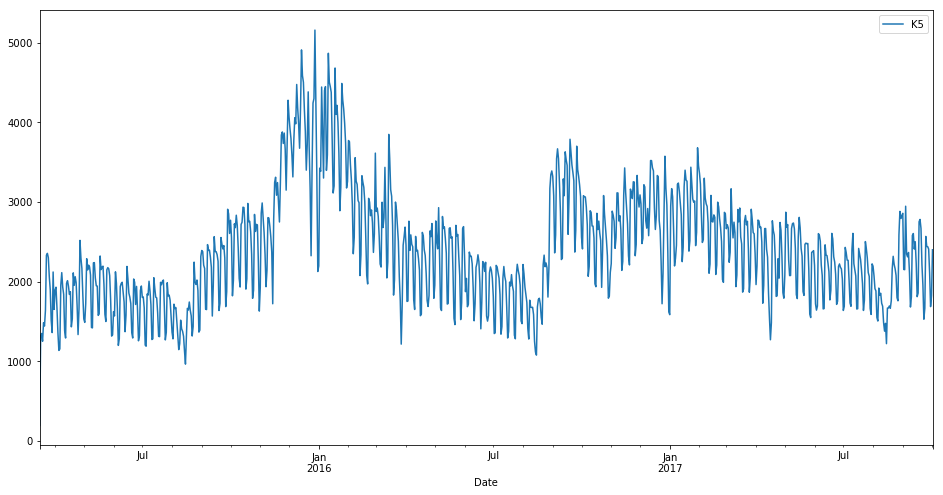

In [14]:
kvar = 'K5'
df_kpis.plot(x='Date', y=kvar, figsize=(16, 8))

From the chart it's difficult to distinguish a clear trend. There is huge spike in the period from Aug 2015 to Jan 2015, but we can't see the same trend for the next year. There seems to be a decreasing trend from Jan to Jul in all the years.

Let's make a stationary test

In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_kpis[kvar].values)

C:\Users\lynkx\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-2.9373226985142549,
 0.041176844302112381,
 21,
 910,
 {'1%': -3.4375564198635562,
  '10%': -2.5684639415529524,
  '5%': -2.8647213198889023},
 12517.095259855216)

In [16]:
df = df_kpis[['Date','K5']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

C:\Users\lynkx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The series *IS* stationary (p-value: 0.0412).
Let's decompose the series:

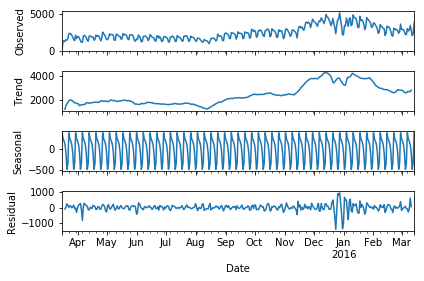

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df[df.index < '2016-03-15'])
decomp.plot()
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import acf, plot_acf
from statsmodels.graphics.tsaplots import pacf, plot_pacf

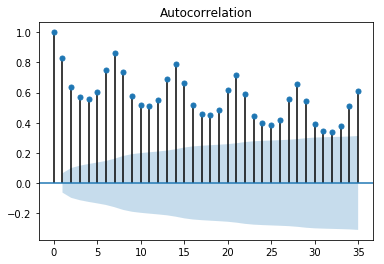

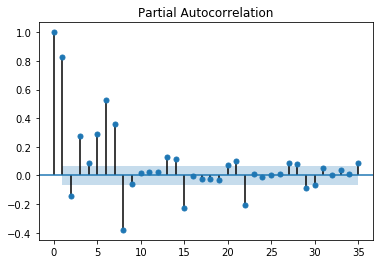

In [19]:
plot_acf(df_kpis[kvar].values, lags=35)
plot_pacf(df_kpis[kvar].values, lags=35)
plt.show()

There is a clear seasonality and looks like it's an autoregressive process. 
It's worth to try differentiate the data at weekly level.

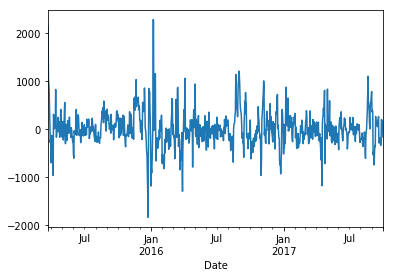

In [20]:
df_diff = df[kvar] - df[kvar].shift(7)
df_diff = df_diff[df_diff.notnull()]
df_diff.plot()

In [21]:
adfuller(df_diff)

(-6.5125525654914389,
 1.0912521595220153e-08,
 21,
 903,
 {'1%': -3.43761244359048,
  '10%': -2.5684770993820281,
  '5%': -2.8647460220589736},
 12421.777709419881)

Now the series is definitely stationary

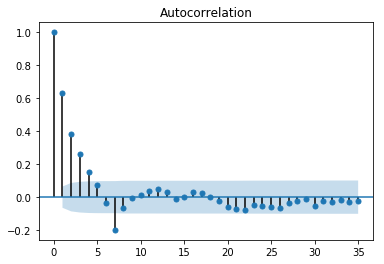

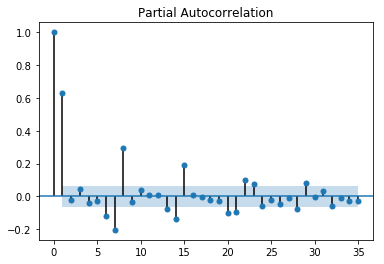

In [22]:
plot_acf(df_diff, lags=35)
plot_pacf(df_diff, lags=35)
plt.show()

In [23]:
print(acf(df_diff))

for i in range(2,5): print(acf(df_diff)[1]**i)

[ 1.          0.62993596  0.38363842  0.26064583  0.15409894  0.0730511
 -0.03751649 -0.19870636 -0.06397056 -0.00692033  0.01312328  0.03866718
  0.04890904  0.0293196  -0.00886087 -0.0014386   0.02896498  0.0240836
  0.00142228 -0.02570698 -0.06061494 -0.06989025 -0.08010512 -0.05013217
 -0.05116229 -0.05701016 -0.06718192 -0.03570706 -0.02449523 -0.0121634
 -0.0511615  -0.02522675 -0.02648292 -0.01858947 -0.02882513 -0.02033092
 -0.038479   -0.03810552 -0.0555665  -0.03860386 -0.01904167]
0.396819314848
0.249970756407
0.157465568637


Looks like *df_diff* is a model AR(1)

const       11.119811
ar.L1.K5     0.654286
dtype: float64


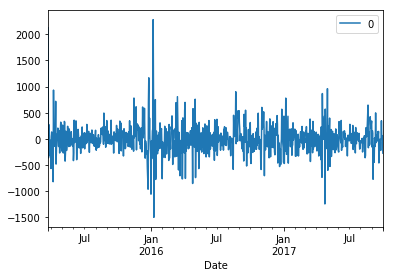

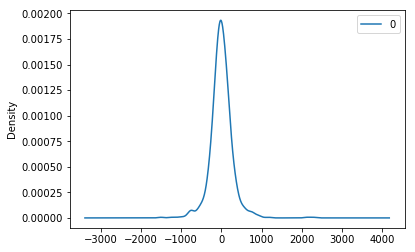

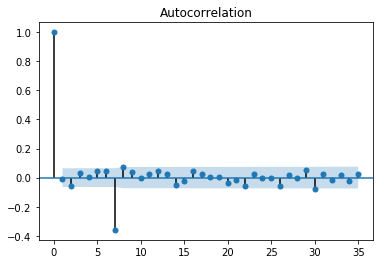

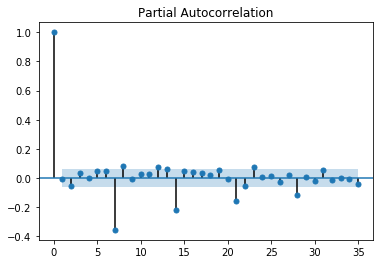

In [24]:
from statsmodels.tsa.arima_model import ARIMA
df_diff_ar1 = ARIMA(df_diff, order=(1,0,0))
ar1_fit = df_diff_ar1.fit()
print(ar1_fit.params)

# plot residual errors
residuals = pd.DataFrame(ar1_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plot_acf(residuals, lags=35)
plot_pacf(residuals, lags=35)
plt.show()

In [25]:
# from statsmodels.stats.diagnostic import acorr_ljungbox
# ljungbox_test = acorr_ljungbox(residuals, lags=35)

Let's try a SARIMA as well, there seems to be a progressive degradation in the acf plot on the season pattern (weekly)

ar.L1          0.621702
ma.S.L1        0.056047
sigma2     75665.246822
dtype: float64


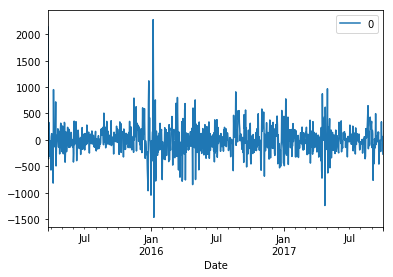

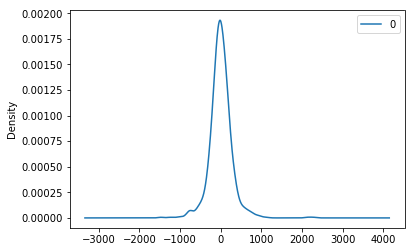

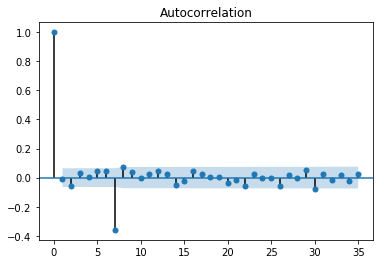

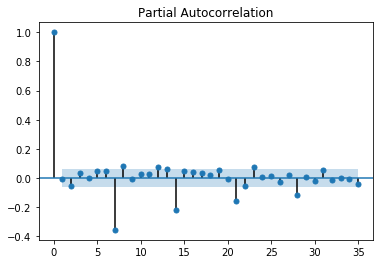

In [26]:
from statsmodels.tsa.statespace import sarimax
df_diff_sarma11 = sarimax.SARIMAX(df_diff, order=(1,0,0), seasonal_order=(0,0,1,0))

sarma11_fit = df_diff_sarma11.fit()
print(sarma11_fit.params)


# plot residual errors
residualss = pd.DataFrame(sarma11_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residuals, lags=35)
plot_pacf(residuals, lags=35)
plt.show()

### Extra: try with second differences

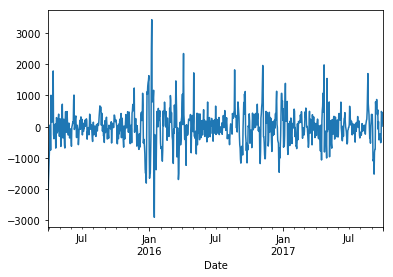

In [27]:
df_diff2 = df_diff - df_diff.shift(7)
df_diff2 = df_diff2[df_diff2.notnull()]
df_diff2.plot()

In [28]:
adfuller(df_diff2)

(-8.5642346818065462,
 8.531880388590654e-14,
 21,
 896,
 {'1%': -3.4376693452209492,
  '10%': -2.5684904632194674,
  '5%': -2.864771110849186},
 12720.636862422789)

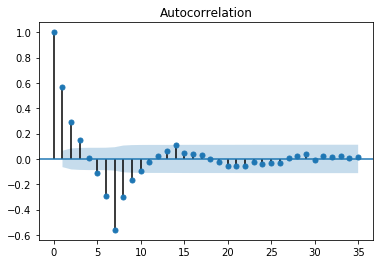

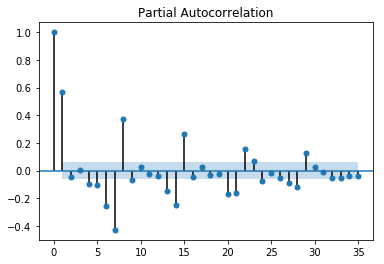

In [29]:
plot_acf(df_diff2, lags=35)
plot_pacf(df_diff2, lags=35)
plt.show()

In [30]:
print(acf(df_diff2))

for i in range(2,5): print(acf(df_diff2)[1]**i)

[ 1.          0.56550849  0.28775507  0.14661494  0.00987284 -0.10811535
 -0.2920592  -0.56040751 -0.3002351  -0.16470254 -0.09910595 -0.02755763
  0.02258958  0.0639191   0.10621105  0.04934562  0.03975465  0.02908127
 -0.00156152 -0.02267484 -0.05642425 -0.0570386  -0.05813316 -0.02706335
 -0.03949956 -0.03300066 -0.03567627  0.00828004  0.0223194   0.03947877
 -0.0101255   0.0219268   0.01818275  0.02042258  0.00442005  0.01458505
 -0.02756674 -0.01919456 -0.04055069 -0.0321491  -0.02542723]
0.319799848721
0.180849528551
0.102271943242


ar.L1           0.542656
ma.L1          -0.115284
ma.S.L1         0.177110
sigma2     200154.594748
dtype: float64


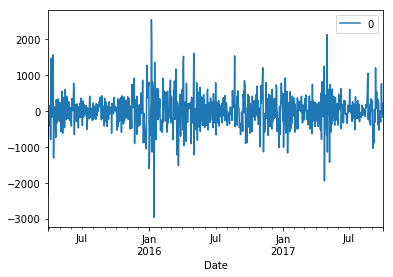

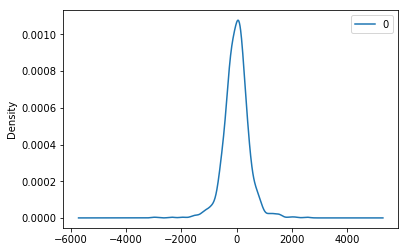

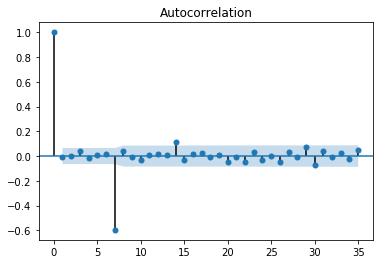

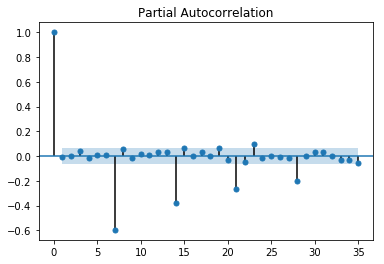

In [31]:
from statsmodels.tsa.statespace import sarimax
df_diff2_sarma12 = sarimax.SARIMAX(df_diff2, order=(1,0,1), seasonal_order=(0,0,1,0))
sarma12_fit = df_diff2_sarma12.fit()
print(sarma12_fit.params)

# plot residual errors
residualss = pd.DataFrame(sarma12_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

## With exonegous variables

Let's calculate the correlation between the different metrics

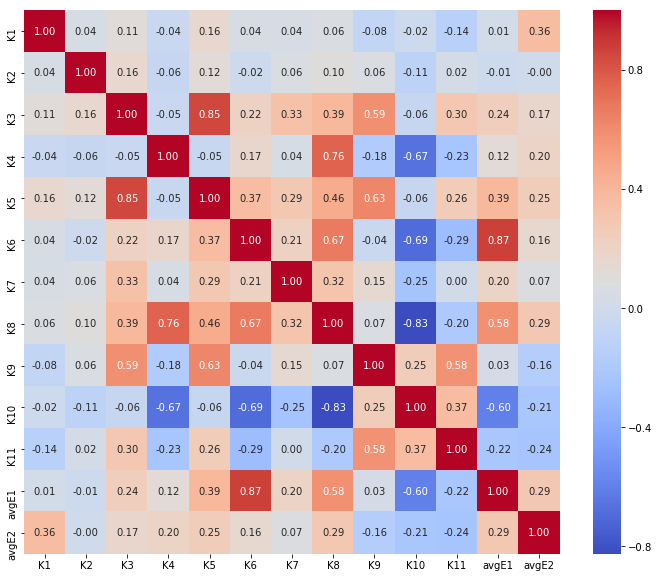

In [39]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))
g = sns.heatmap(df_kpis.drop(['Date', 'month', 'weekday'], axis=1).corr(), annot=True,
                fmt=".2f", cmap='coolwarm', ax=ax)

K3 and K9 seem to be the most correlated with K5

Let's see those series

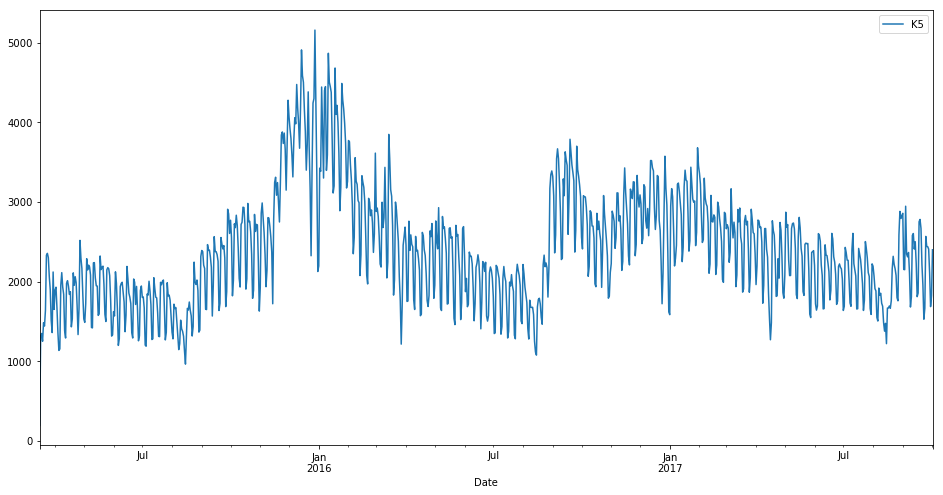

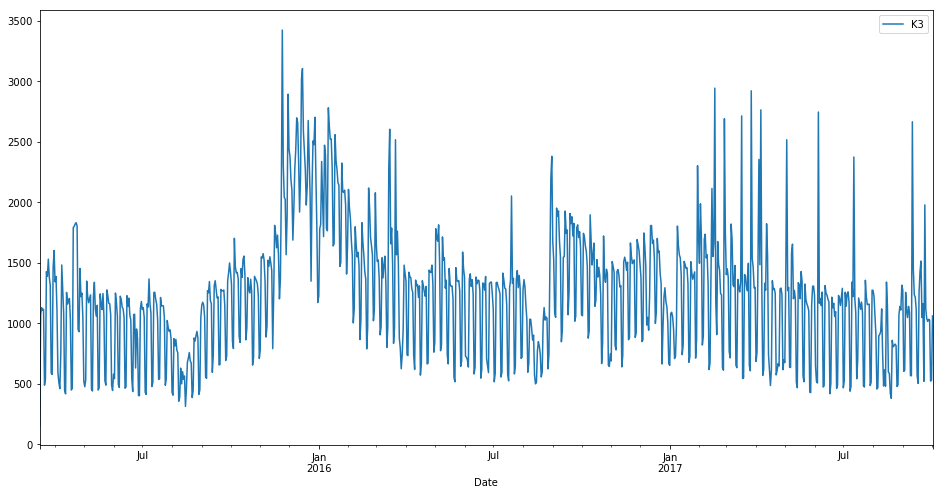

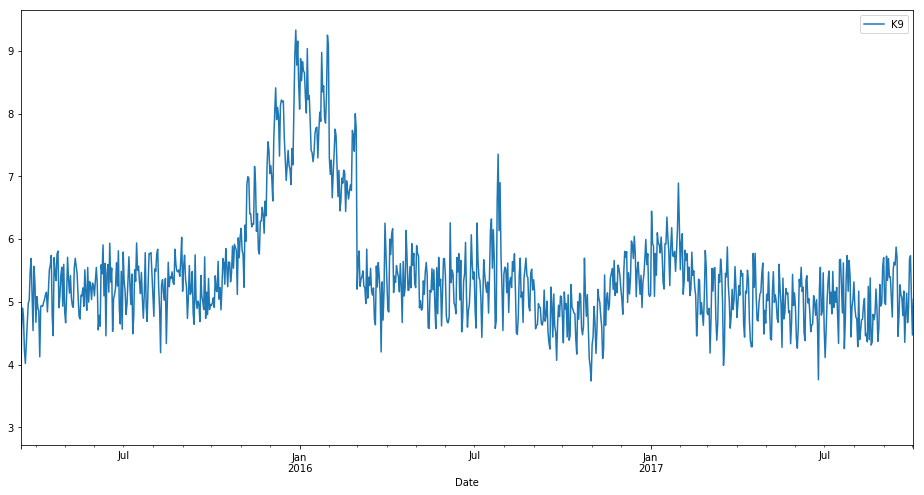

In [42]:
df_kpis.plot(x='Date', y='K5', figsize=(16, 8))
df_kpis.plot(x='Date', y='K3', figsize=(16, 8))
df_kpis.plot(x='Date', y='K9', figsize=(16, 8))

K3 and K9 show the same trend of K5, being particulary good on the period between Oct 2015 and Mar 2016

NOTE: is it worth to smooth the series?

In [44]:
df.head()

,K5
Date,
2015-03-16,194
2015-03-17,1320
2015-03-18,1349
2015-03-19,1251
2015-03-20,1484


In [45]:
# weekly differentiation
df = df_kpis[['Date','K5', 'K3', 'K9']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

def diff1(df, var, lag):
    df_diff = df[var] - df[var].shift(lag)
    return df_diff[df_diff.notnull()]

df_diffK5 = diff1(df, 'K5', 7)
df_diffK3 = diff1(df, 'K3', 7)
df_diffK9 = diff1(df, 'K9', 7)

C:\Users\lynkx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


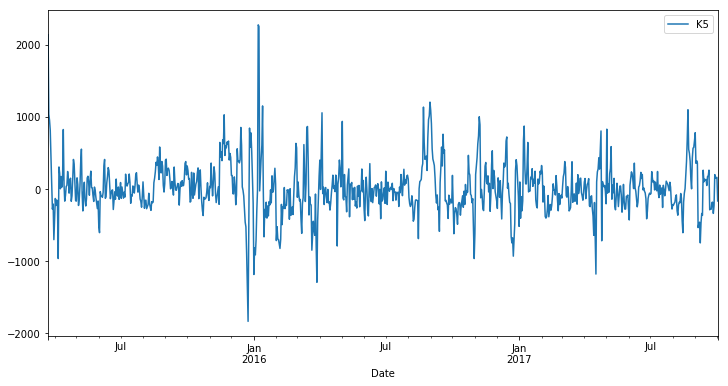

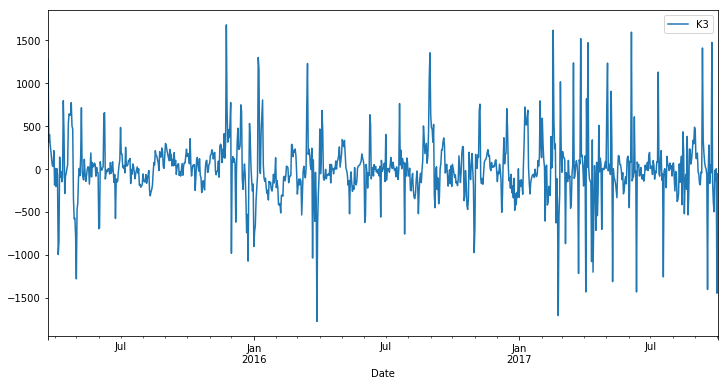

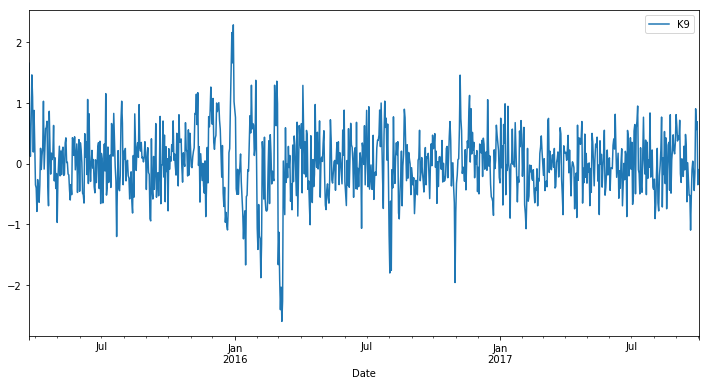

In [52]:
df_diff_var = pd.concat([df_diffK5, df_diffK3, df_diffK9], axis=1)

df_diff_var.plot(df_diff_var.index, 'K5', figsize=(12,6))
df_diff_var.plot(df_diff_var.index, 'K3', figsize=(12,6))
df_diff_var.plot(df_diff_var.index, 'K9', figsize=(12,6))

In [53]:
df_diff_var.corr()

,K5,K3,K9
K5,1.000000,0.527307,0.273898
K3,0.527307,1.000000,0.185830
K9,0.273898,0.185830,1.000000


After the differencing, K9 seems to be less correlated with K5...

0.310103617929


[]

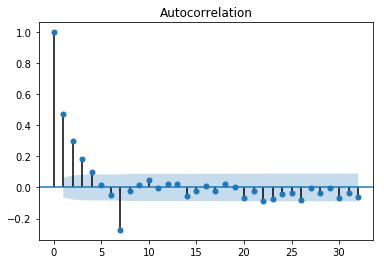

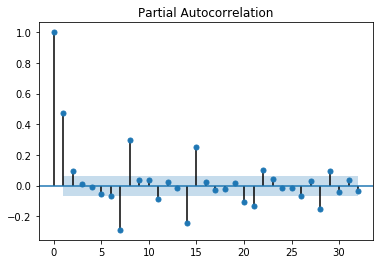

In [78]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
dfdv_std = stdscaler.fit_transform(df_diff_var)
dfdv_std = pd.DataFrame(dfdv_std, columns=df_diff_var.columns, index=df_diff_var.index)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(dfdv_std[['K3', 'K9']], dfdv_std['K5'])
print(lm.score(dfdv_std[['K3', 'K9']], dfdv_std['K5']))

y_pred = lm.predict(dfdv_std[['K3', 'K9']])
residuals = dfdv_std['K5'] - y_pred

plot_acf(residuals, lags=32)
plot_pacf(residuals, lags=32)
plt.plot()

Residuals seem to follow the same pattern as the series, let's use a SARIMA

K3         0.299176
K9         0.113948
ar.L1      0.641162
ma.S.L1   -0.087136
sigma2     0.492414
dtype: float64


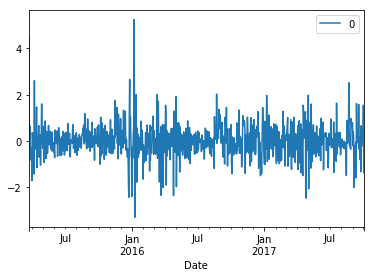

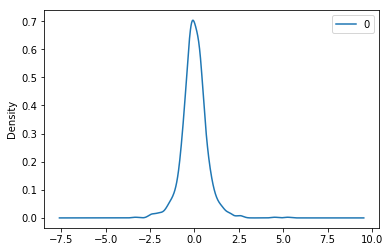

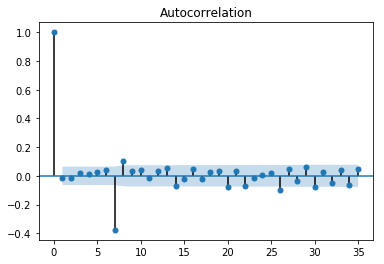

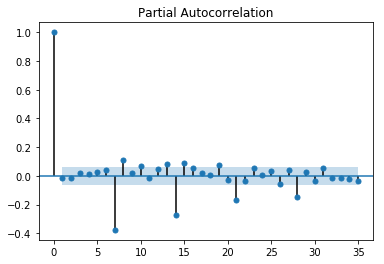

In [83]:
from statsmodels.tsa.statespace import sarimax
df_diff_var_sarma11 = sarimax.SARIMAX(dfdv_std['K5'], order=(1,0,0), seasonal_order=(0,0,1,0),
                                  exog=dfdv_std[['K3', 'K9']])

sarmavar11_fit = df_diff_var_sarma11.fit()
print(sarmavar11_fit.params)


# plot residual errors
residualss = pd.DataFrame(sarmavar11_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

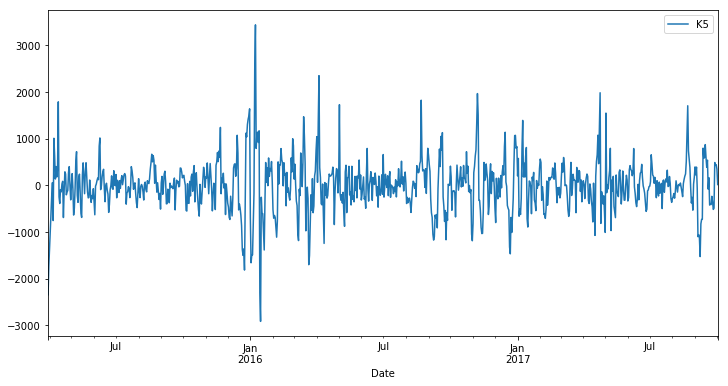

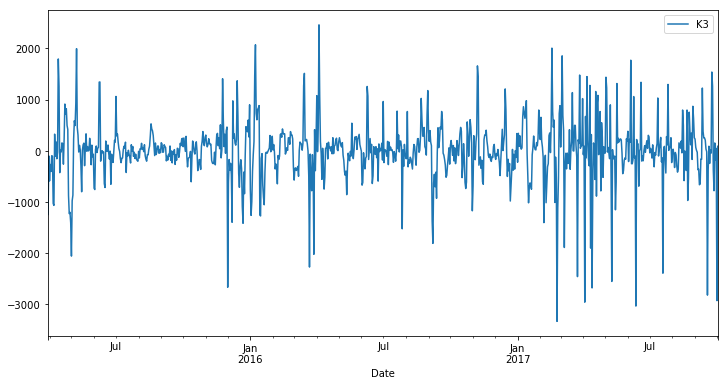

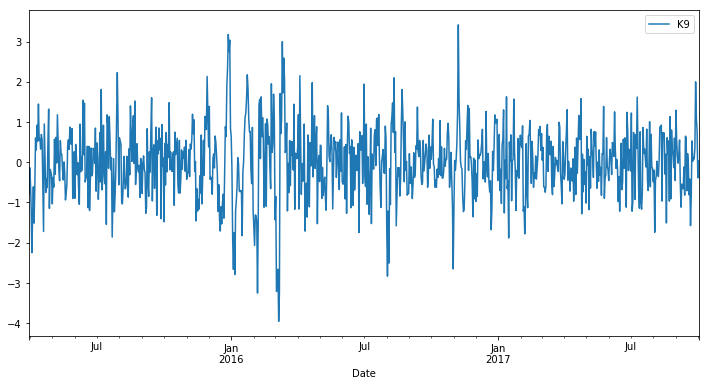

In [84]:
# let's try with a second differentiation
df_diff2K5 = diff1(df_diff_var, 'K5', 7)
df_diff2K3 = diff1(df_diff_var, 'K3', 7)
df_diff2K9 = diff1(df_diff_var, 'K9', 7)

df_diff2_var = pd.concat([df_diff2K5, df_diff2K3, df_diff2K9], axis=1)

df_diff2_var.plot(df_diff2_var.index, 'K5', figsize=(12,6))
df_diff2_var.plot(df_diff2_var.index, 'K3', figsize=(12,6))
df_diff2_var.plot(df_diff2_var.index, 'K9', figsize=(12,6))

In [85]:
df_diff2_var.corr()

,K5,K3,K9
K5,1.000000,0.474994,0.293990
K3,0.474994,1.000000,0.182622
K9,0.293990,0.182622,1.000000


0.270051717906


[]

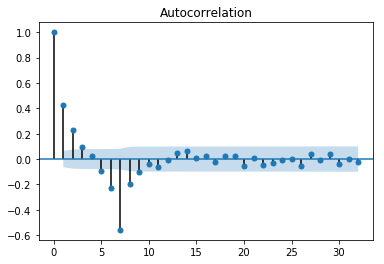

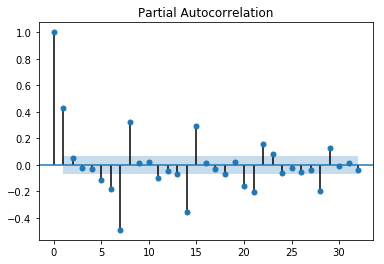

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

stdscaler2 = StandardScaler()
dfd2v_std = stdscaler2.fit_transform(df_diff2_var)
dfd2v_std = pd.DataFrame(dfd2v_std, columns=df_diff2_var.columns, index=df_diff2_var.index)

lm = LinearRegression()
lm.fit(dfd2v_std[['K3', 'K9']], dfd2v_std['K5'])
print(lm.score(dfd2v_std[['K3', 'K9']], dfd2v_std['K5']))

y_pred = lm.predict(dfd2v_std[['K3', 'K9']])
residuals = dfd2v_std['K5'] - y_pred

plot_acf(residuals, lags=32)
plot_pacf(residuals, lags=32)
plt.plot()

Residuals seem to follow the same pattern as the series, let's use a SARIMA

K3         0.288318
K9         0.131831
ar.L1      0.260370
ar.S.L1    0.260370
sigma2     0.574469
dtype: float64


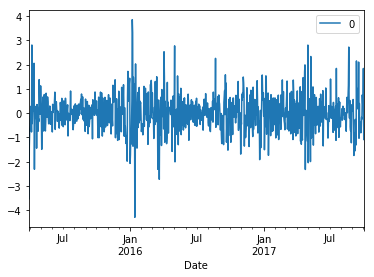

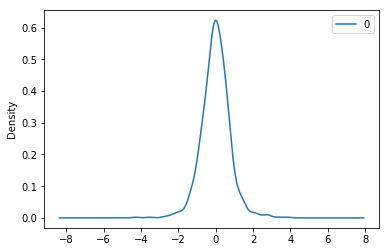

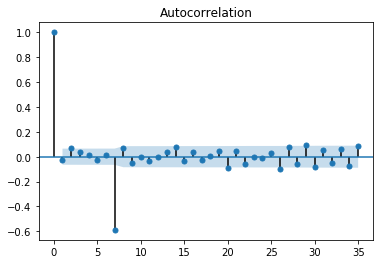

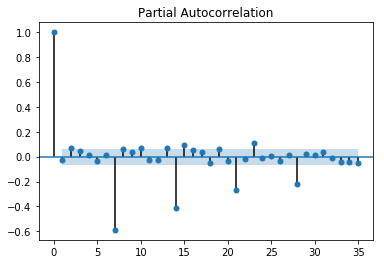

In [90]:
from statsmodels.tsa.statespace import sarimax
df_diff2_var_sarma11 = sarimax.SARIMAX(dfd2v_std['K5'], order=(1,0,0), seasonal_order=(0,0,1,0),
                                  exog=dfd2v_std[['K3', 'K9']])

sarmavar11_fit2 = df_diff2_var_sarma11.fit()
print(sarmavar11_fit2.params)


# plot residual errors
residualss = pd.DataFrame(sarmavar11_fit2.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()